# Load packages

In [6]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
nltk.download('vader_lexicon')
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
tokyo_tweets_df = pd.read_csv("C:/Users/Admin/Downloads/tokyo_2020_tweets.csv")
tokyo_tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
5,1418885092571766792,Sab Joke H,India,Follows you,2020-09-05 19:50:35,107.0,88.0,102.0,False,2021-07-24 10:45:42,#Tokyo2020 #Olympics\n#MirabaiChanu\n#Weightli...,"['Tokyo2020', 'Olympics', 'MirabaiChanu', 'Wei...",Twitter for Android,0.0,0.0,False
6,1418880445161353228,evija87,City by the water,Eva. | Watch Lucifer on Netflix📺 coming MAY 28TH,2009-12-01 23:55:34,224.0,652.0,84310.0,False,2021-07-24 10:27:14,Can't help but cheer for them. Banda 6 goals i...,NaN,Twitter Web App,0.0,0.0,False
7,1418889399203475466,INQUIRER Sports,Manila,The official Twitter account of INQUIRER Sport...,2009-11-11 08:20:00,48937.0,522.0,555.0,True,2021-07-24 11:02:49,@inquirerdotnet @ftjochoaINQ Caloy Yulo's 14.0...,NaN,TweetDeck,0.0,0.0,False
8,1418889399081656321,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103976.0,2724.0,36554.0,True,2021-07-24 11:02:49,Q3 🇨🇦 1-4 🇩🇪\n\nGreen card for Canada's captai...,"['Tokyo2020', 'CANvGER']",Twitter Web App,0.0,0.0,False
9,1418889398670794759,Prashanth Kommunje,"Puttur, Karnataka,India",ಹಿಂದುಸ್ಥಾನದ ಹೆಮ್ಮೆಯ ತುಳುನಾಡ ಕನ್ನಡಿಗ,2012-01-07 16:26:20,76.0,175.0,1406.0,False,2021-07-24 11:02:48,Hearty Congratulations to \nIndian Railways 🏋️...,NaN,Twitter for Android,0.0,0.0,False


# Data exploration

In [20]:
# Convert the 'date' column to datetime type
tokyo_tweets_df['date'] = pd.to_datetime(tokyo_tweets_df['date'], errors='coerce')

# Extract year, month, day, day of week, hour, and minute from the 'date' column
tokyo_tweets_df['year'] = tokyo_tweets_df['date'].dt.year
tokyo_tweets_df['month'] = tokyo_tweets_df['date'].dt.month
tokyo_tweets_df['day'] = tokyo_tweets_df['date'].dt.day
tokyo_tweets_df['dayofweek'] = tokyo_tweets_df['date'].dt.dayofweek
tokyo_tweets_df['hour'] = tokyo_tweets_df['date'].dt.hour
tokyo_tweets_df['minute'] = tokyo_tweets_df['date'].dt.minute

In [10]:
# Convert the columns to numeric data types, replacing non-numeric values with NaN
tokyo_tweets_df['retweets'] = pd.to_numeric(tokyo_tweets_df['retweets'], errors='coerce')
tokyo_tweets_df['favorites'] = pd.to_numeric(tokyo_tweets_df['favorites'], errors='coerce')
tokyo_tweets_df['user_followers'] = pd.to_numeric(tokyo_tweets_df['user_followers'], errors='coerce')

# Remove rows with missing values in the columns used for analysis
tokyo_tweets_df.dropna(subset=['retweets', 'favorites', 'user_followers'], inplace=True)

In [11]:
print(f"data shape: {tokyo_tweets_df.shape}")
print("--------------------")
tokyo_tweets_df.info()

data shape: (160525, 22)
--------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 160525 entries, 0 to 297010
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                160525 non-null  object        
 1   user_name         160525 non-null  object        
 2   user_location     122504 non-null  object        
 3   user_description  151898 non-null  object        
 4   user_created      160525 non-null  object        
 5   user_followers    160525 non-null  float64       
 6   user_friends      160525 non-null  object        
 7   user_favourites   160525 non-null  object        
 8   user_verified     160525 non-null  object        
 9   date              160525 non-null  datetime64[ns]
 10  text              160525 non-null  object        
 11  hashtags          123023 non-null  object        
 12  source            160525 non-null  object        
 13  retweets     

# Quantitative analysis

In [12]:
tokyo_tweets_df.describe()

,user_followers,retweets,favorites,year,month,day,dayofweek,hour,minute
count,1.605250e+05,160525.000000,160525.000000,160525.0,160525.0,160525.000000,160525.000000,160525.000000,160525.000000
mean,1.417768e+05,2.518629,14.132372,2021.0,7.0,25.565868,2.816938,9.472437,29.289076
std,1.529727e+06,43.109598,149.978699,0.0,0.0,0.953795,2.703033,5.588188,17.409214
min,0.000000e+00,0.000000,0.000000,2021.0,7.0,24.000000,0.000000,0.000000,0.000000
25%,1.580000e+02,0.000000,0.000000,2021.0,7.0,25.000000,0.000000,5.000000,14.000000
50%,6.850000e+02,0.000000,1.000000,2021.0,7.0,26.000000,1.000000,9.000000,30.000000
75%,3.677000e+03,0.000000,3.000000,2021.0,7.0,26.000000,6.000000,13.000000,44.000000
max,5.420659e+07,6429.000000,14382.000000,2021.0,7.0,27.000000,6.000000,23.000000,59.000000


## Phân tích tương quan

In [13]:
correlation_matrix = tokyo_tweets_df[['retweets', 'favorites', 'user_followers']].corr()
print(correlation_matrix)

                retweets  favorites  user_followers
retweets        1.000000   0.824373        0.109236
favorites       0.824373   1.000000        0.222651
user_followers  0.109236   0.222651        1.000000


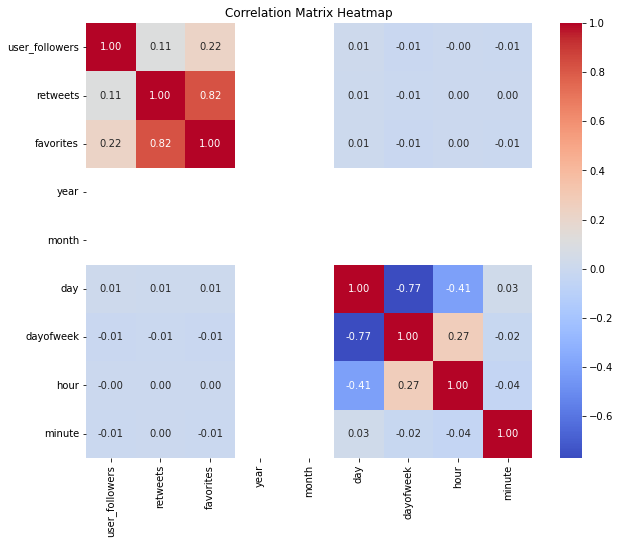

In [14]:
# Calculate correlation matrix
correlation_matrix = tokyo_tweets_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Phân tích hồi quy

In [15]:
# Define the dependent and independent variables
X = tokyo_tweets_df[['retweets', 'favorites']]
y = tokyo_tweets_df['user_followers']

In [16]:
# Add constant term to independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         user_followers   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5746.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:33:49   Log-Likelihood:            -2.5082e+06
No. Observations:              160525   AIC:                         5.016e+06
Df Residuals:                  160522   BIC:                         5.016e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.029e+05   3706.802     27.747      0.0

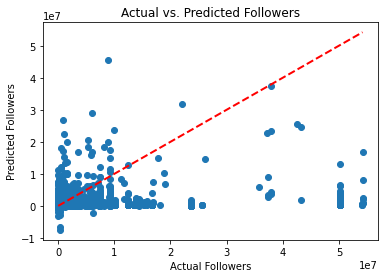

In [17]:
plt.scatter(y, model.fittedvalues)
plt.xlabel('Actual Followers')
plt.ylabel('Predicted Followers')
plt.title('Actual vs. Predicted Followers')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', linewidth=2)
plt.show()

In [26]:
# Convert the 'date' column to datetime type
tokyo_tweets_df['date'] = pd.to_datetime(tokyo_tweets_df['date'], errors='coerce')

# Extract year, month, day, day of week, hour, and minute from the 'date' column
tokyo_tweets_df['year'] = tokyo_tweets_df['date'].dt.year
tokyo_tweets_df['month'] = tokyo_tweets_df['date'].dt.month
tokyo_tweets_df['day'] = tokyo_tweets_df['date'].dt.day
tokyo_tweets_df['dayofweek'] = tokyo_tweets_df['date'].dt.dayofweek
tokyo_tweets_df['hour'] = tokyo_tweets_df['date'].dt.hour
tokyo_tweets_df['minute'] = tokyo_tweets_df['date'].dt.minute

In [27]:
# Group the DataFrame by date_only and count the number of tweets on each date
df_agg = tokyo_tweets_df.groupby(tokyo_tweets_df['date'].dt.date)["text"].count().reset_index()
df_agg.columns = ["date_only", "count"]

# Display the result
print(df_agg)


    date_only  count
0  2021-07-24  24217
1  2021-07-25  50337
2  2021-07-26  56889
3  2021-07-27  29082


In [36]:
def plot(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=0)
    if hue:
        plt.title('{} grouped by {} {}'.format(y, hue, title), fontsize=15)
    else:
        plt.title('{} | {}'.format(y, title), fontsize=15)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75);
    plt.xlabel('Date', fontsize=20);
    plt.ylabel('Count', fontsize=20);

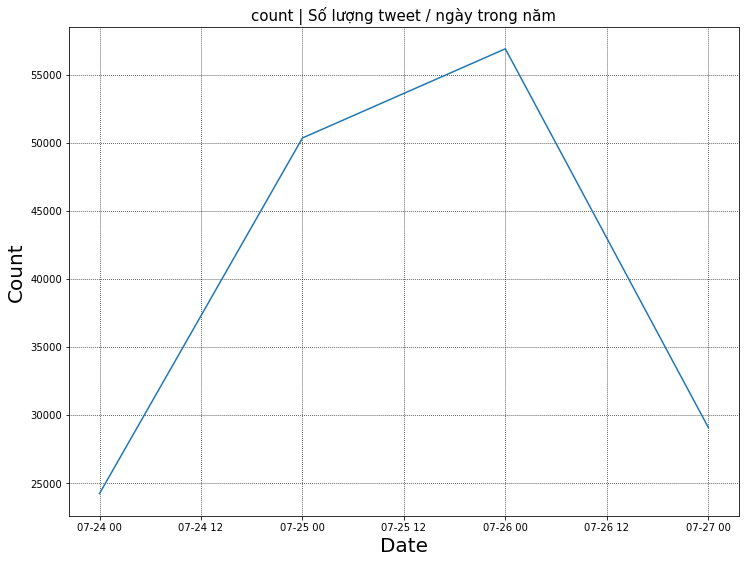

In [37]:
plot(df_agg, title="Số lượng tweet / ngày trong năm",size=3)

## Missing data

In [38]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [39]:
missing_data(tokyo_tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,year,month,day,dayofweek,hour,minute
Total,0,0,38021,8627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,23.685407,5.374241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,object,object,object,object,object,float64,object,object,object,datetime64[ns],...,object,float64,float64,object,int64,int64,int64,int64,int64,int64


## Unique values

In [143]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [144]:
unique_values(tokyo_tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only
Total,297011,165938,127916,157311,160532,160532,160531,160531,160529,160531,...,160525,160526,160526,160526,160526,160526,160526,160526,160526,160526
Uniques,159493,63927,21896,61222,66341,27491,10115,50285,6,105604,...,1,105601,1,1,4,4,24,60,4,4


## Most frequent values

In [145]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [146]:
most_frequent_values(tokyo_tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,is_retweet,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only
Total,297011,165938,127916,157311,160532,160532,160531,160531,160529,160531,...,160525,160526,160526,160526,160526,160526,160526,160526,160526,160526
Most frequent item,or,aLpha sibuea,Red And White Kauntri..,Don't follow if you can't stand with:,2019-10-26 02:56:57,0,334,0,False,2021-07-27 05:00:00,...,False,2021-07-27 05:00:00,2021.0,7.0,26.0,0.0,9.0,0.0,207.0,2021-07-26
Frequence,32768,5395,5395,5395,755,1100,684,1063,82722,22,...,160525,22,160526,160526,56889,56889,16447,4128,56889,56889
Percent from total,11.033,3.251,4.218,3.43,0.47,0.685,0.426,0.662,51.531,0.014,...,100.0,0.014,100.0,100.0,35.439,35.439,10.246,2.572,35.439,35.439


# Visualize the data distribution

## Graphs

In [107]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Số lượng và tỷ lệ phần trăm của {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

### User name

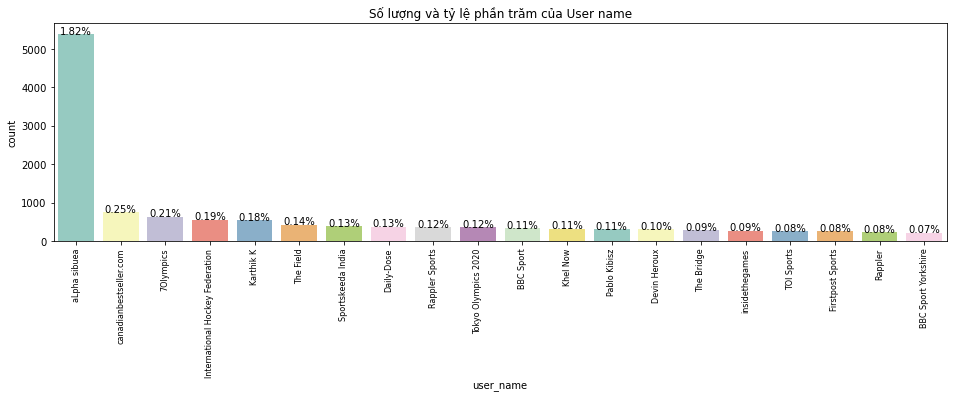

In [108]:
plot_count("user_name", "User name", tokyo_tweets_df,4)

### User location

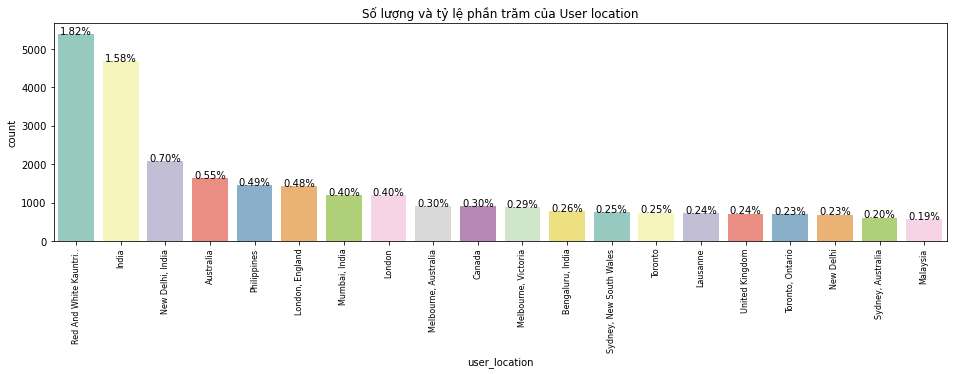

In [109]:
plot_count("user_location", "User location", tokyo_tweets_df,4)

### Tweet source

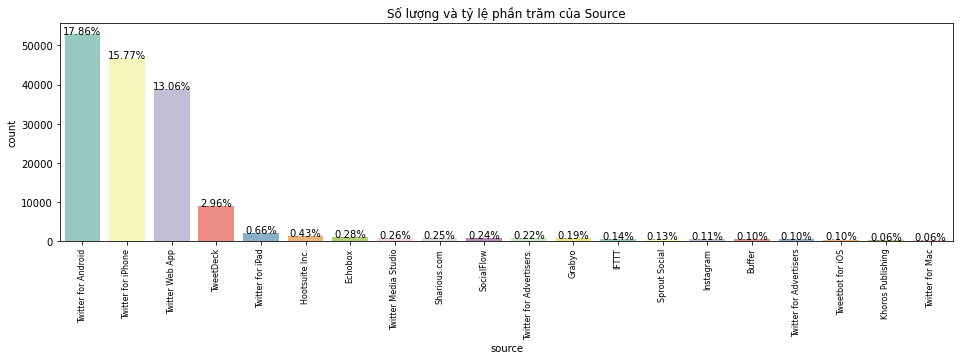

In [110]:
plot_count("source", "Source", tokyo_tweets_df,4)

In [111]:
def bar_plot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Số lượng và tỷ lệ phần trăm của {}".format(title), fontsize=20)
    plt.xlabel('dayofweek', fontsize=15)
    plt.ylabel('count', fontsize=15)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

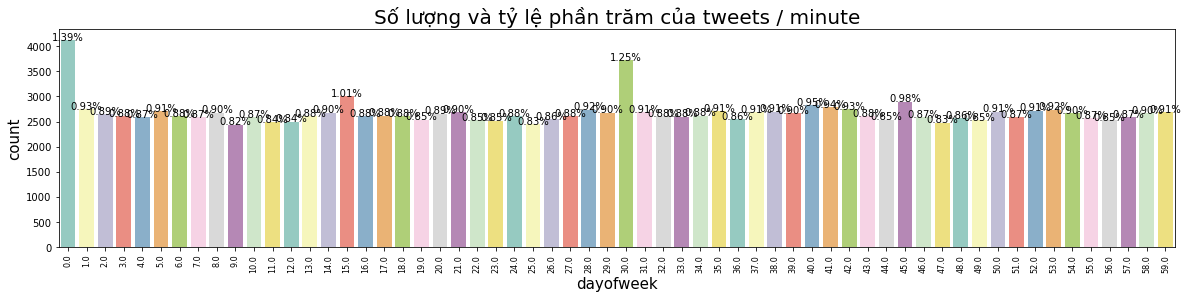

In [112]:
bar_plot("minute", "tweets / minute", tokyo_tweets_df, size=5, ordered=False)

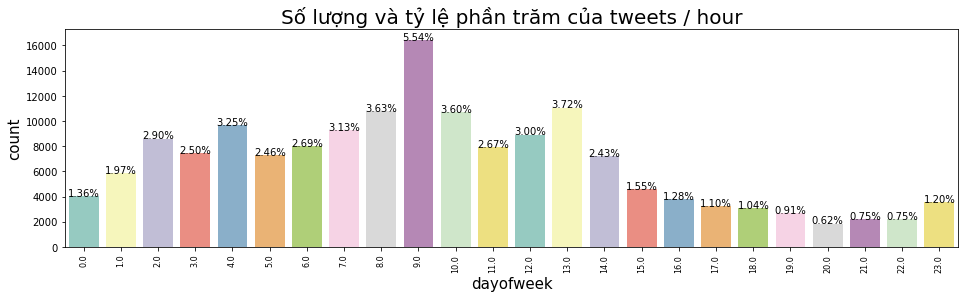

In [113]:
bar_plot("hour", "tweets / hour", tokyo_tweets_df, size=4, ordered=False)

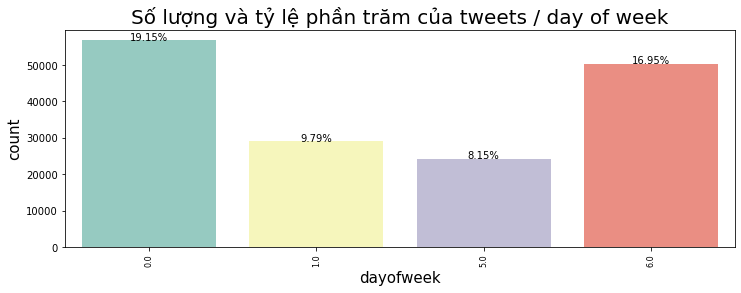

In [114]:
bar_plot("dayofweek", "tweets / day of week", tokyo_tweets_df, size=3, ordered=False)

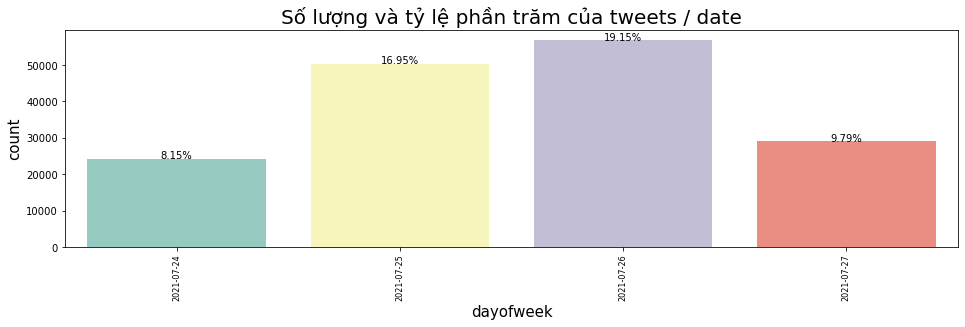

In [115]:
bar_plot("date_only", "tweets / date", tokyo_tweets_df,size=4, ordered=False)

## Word clouds

In [116]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U","mirabai_chanu", "Olympics", "Tokyo2020", "TokyoOlympics", "Olympic", 
                      "Olympics Tokyo2020", "Tokyo2020 Olympics", "Tokyo", "OlympicGames"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

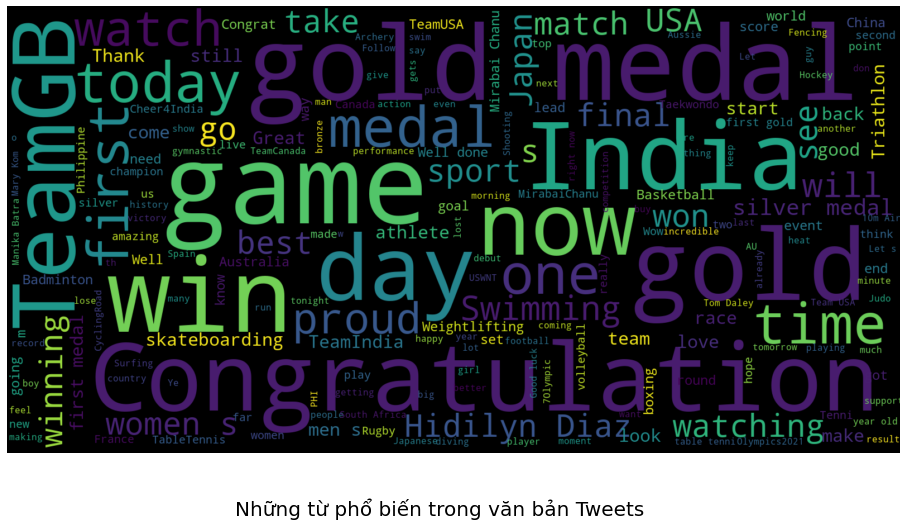

In [117]:
show_wordcloud(tokyo_tweets_df['text'], title = 'Những từ phổ biến trong văn bản Tweets')

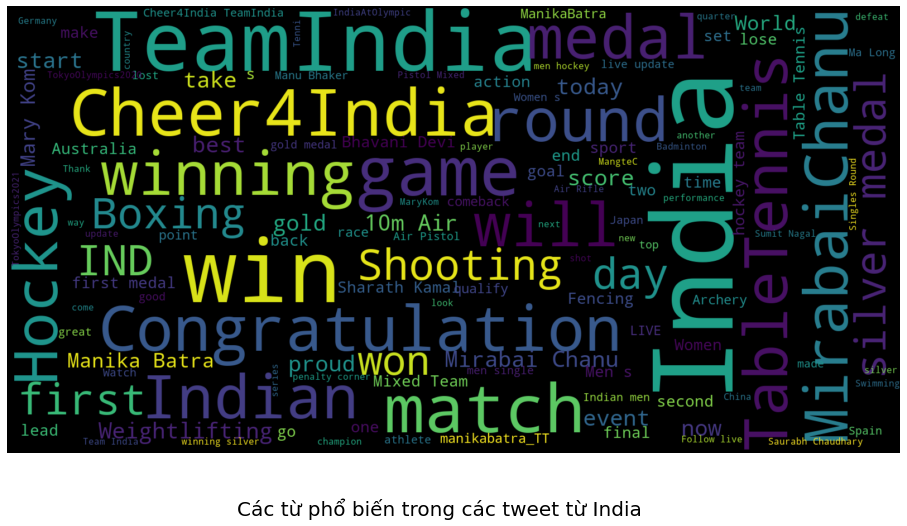

In [118]:
india_df = tokyo_tweets_df.loc[tokyo_tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Các từ phổ biến trong các tweet từ India')

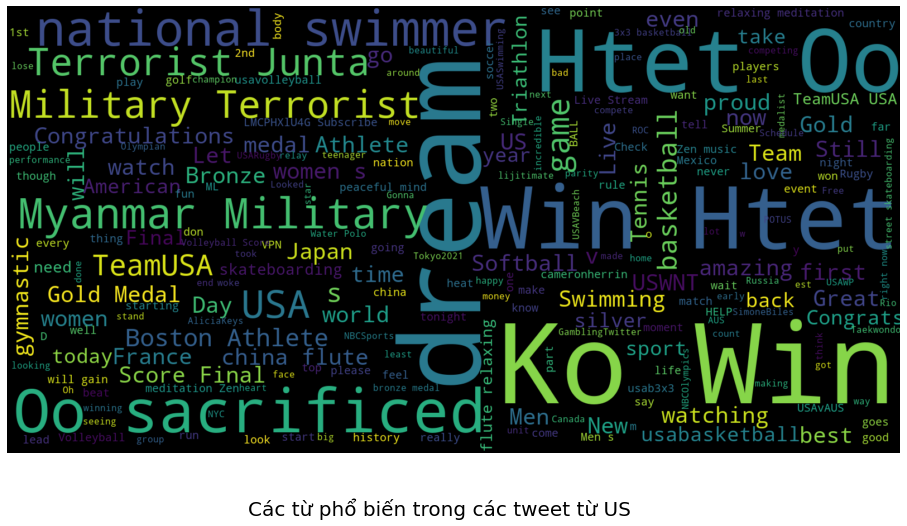

In [119]:
us_df = tokyo_tweets_df.loc[tokyo_tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Các từ phổ biến trong các tweet từ US')

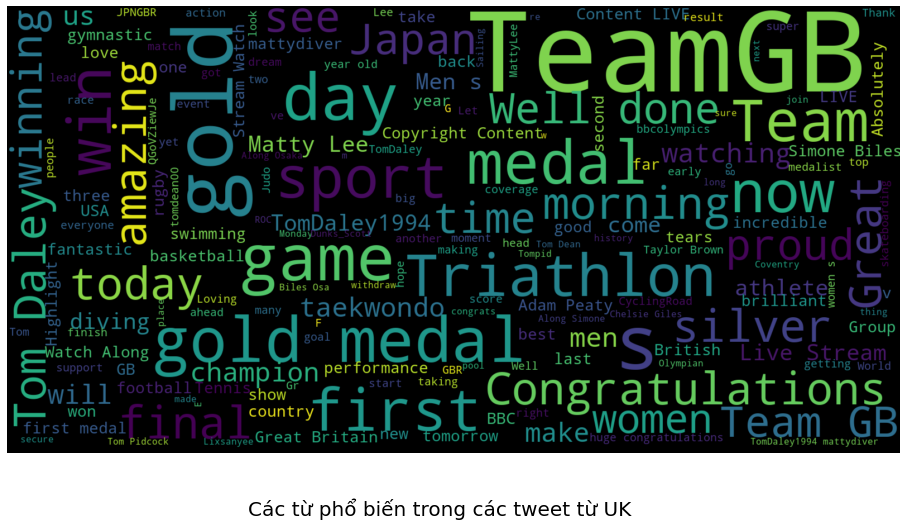

In [120]:
uk_df = tokyo_tweets_df.loc[tokyo_tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Các từ phổ biến trong các tweet từ UK')

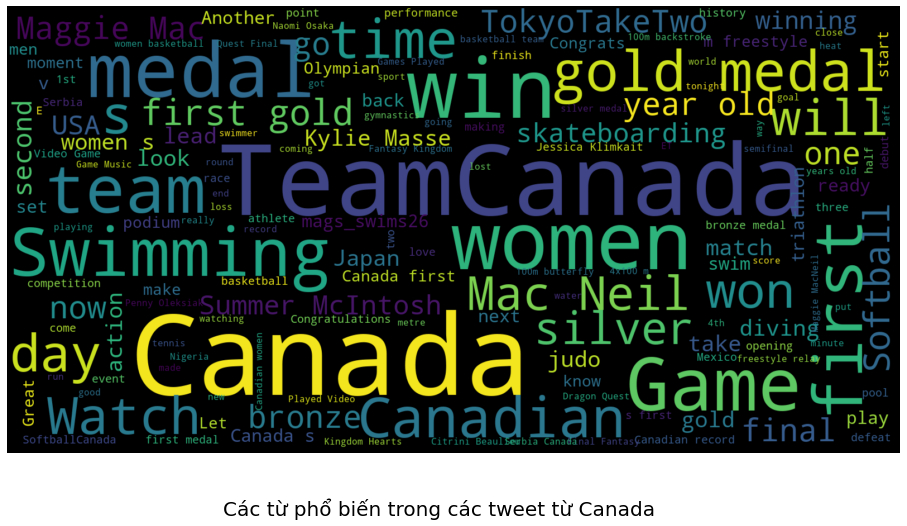

In [121]:
canada_df = tokyo_tweets_df.loc[tokyo_tweets_df.user_location=="Canada"]
show_wordcloud(canada_df['text'], title = 'Các từ phổ biến trong các tweet từ Canada')

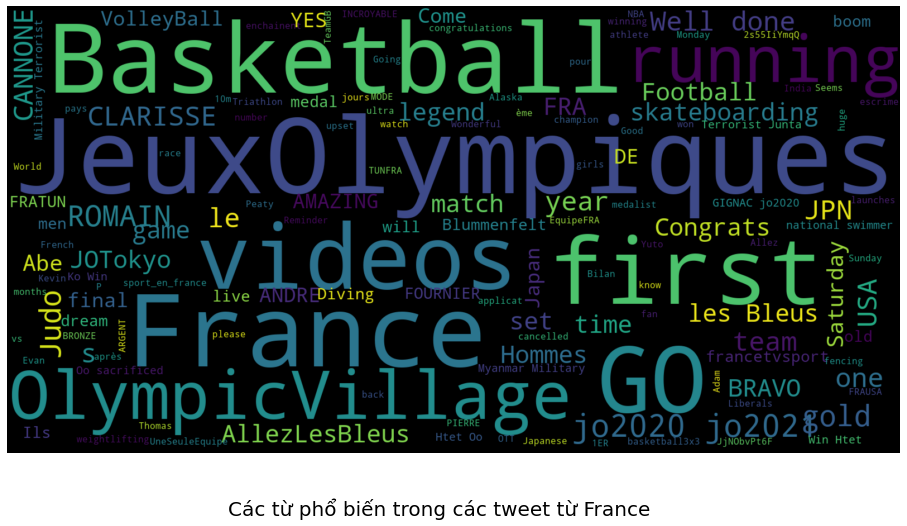

In [122]:
france_df = tokyo_tweets_df.loc[tokyo_tweets_df.user_location=="France"]
show_wordcloud(france_df['text'], title = 'Các từ phổ biến trong các tweet từ France')

## Hashtags analysis

In [123]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()

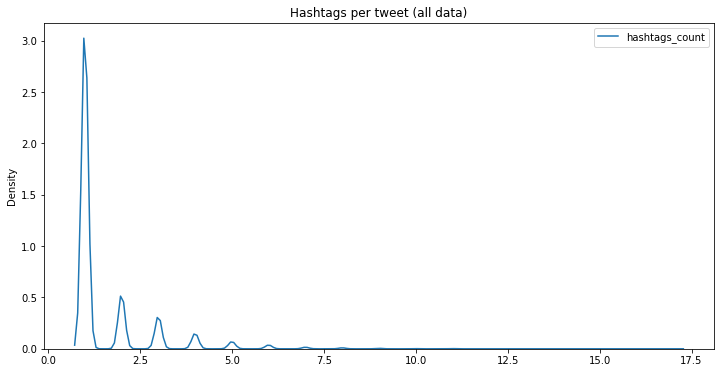

In [124]:
tokyo_tweets_df['hashtags'] = tokyo_tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tokyo_tweets_df['hashtags'] = tokyo_tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tokyo_tweets_df['hashtags_count'] = tokyo_tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tokyo_tweets_df)

In [125]:
tokyo_tweets_df['hashtags_individual'] = tokyo_tweets_df['hashtags'].apply(lambda x: x.split(','))

from itertools import chain
all_hashtags = set(chain.from_iterable(list(tokyo_tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}") 

There are totally: 22994


In [126]:
tokyo_tweets_df['hashtags_individual'].head(10)

0                                      [['Tokyo2020']]
1                                      [['Tokyo2020']]
2                                           [['None']]
3                                           [['None']]
4    [['Tokyo2020',  'ArtisticGymnastics',  '7Olymp...
5    [['Tokyo2020',  'Olympics',  'MirabaiChanu',  ...
6                                           [['None']]
7                                           [['None']]
8                          [['Tokyo2020',  'CANvGER']]
9                                           [['None']]
Name: hashtags_individual, dtype: object

# Sentiment analysis

In [127]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Tích cực"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Tiêu cực"
    else:
        return "Trung lập" 

In [128]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

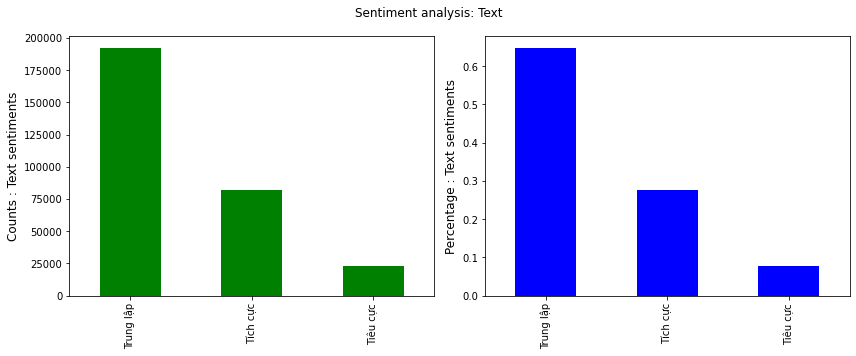

In [129]:
# Replace NaN values in 'text' column with an empty string
tokyo_tweets_df['text'].fillna('', inplace=True)

# Apply sentiment analysis to the 'text' column
tokyo_tweets_df['text_sentiment'] = tokyo_tweets_df['text'].apply(lambda x: find_sentiment(x))

# Plot the sentiment analysis results
plot_sentiment(tokyo_tweets_df, 'text_sentiment', 'Text')

## With TextBlob

In [130]:
def find_sentiment_polarity_textblob(post):
    blob = TextBlob(post)
    polarity = 0
    for sentence in blob.sentences:
        polarity += sentence.sentiment.polarity
    return polarity

def find_sentiment_subjectivity_textblob(post):
    blob = TextBlob(post)
    subjectivity = 0
    for sentence in blob.sentences:
        subjectivity += sentence.sentiment.subjectivity
    return subjectivity

In [131]:
tokyo_tweets_df['text_sentiment_polarity'] = tokyo_tweets_df['text'].apply(lambda x: find_sentiment_polarity_textblob(x))
tokyo_tweets_df['text_sentiment_subjectivity'] = tokyo_tweets_df['text'].apply(lambda x: find_sentiment_subjectivity_textblob(x))

In [132]:
def plot_sentiment_textblob(df, feature, title):
    polarity = df[feature+'_sentiment_polarity']
    subjectivity = df[feature+'_sentiment_subjectivity']

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity : {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity: {title}', size=12)
    plt.suptitle(f"Sentiment analysis (polarity & subjectivity): {title}")
    plt.tight_layout()
    plt.show()

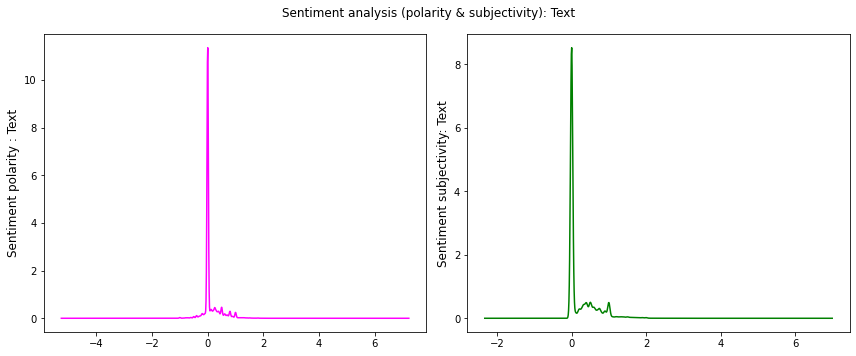

In [133]:
plot_sentiment_textblob(tokyo_tweets_df, "text", 'Text')